## env : pycromanager

In [3]:
from watermark import watermark
print(watermark())

Last updated: 2023-05-30T10:22:33.995157-05:00

Python implementation: CPython
Python version       : 3.10.11
IPython version      : 8.13.2

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
CPU cores   : 8
Architecture: 64bit



## loading dependencies

In [5]:
import numpy as np
from matplotlib.pyplot import *
%matplotlib inline
from PIL import Image

from scipy.ndimage import maximum_filter

In [22]:
from pycromanager import Core

core = Core()
print(core)

In [7]:
def obj_to_list(name):
    name = [name.get(i) for i in range(name.size())]
    return name

# fixing stuff

In [10]:
core.get_pixel_size_um()

0.5

In [24]:
pos = core.get_xy_stage_position()

In [26]:
pos.to_string()

'Point2D.Double[0.495, -0.0]'

In [34]:
core.get_property('Camera', 'OnCameraCCDXSize')

'512'

In [35]:
obj = core.get_device_property_names('Objective')

In [39]:
dev_prop = obj_to_list(obj)

In [41]:
for name in dev_prop:
    prop = core.get_property('Objective', name)
    print(name,":", prop, "\n")

Description : Demo objective turret driver 

HubID :  

Label : Nikon 20X Plan Fluor ELWD 

Name : DObjective 

State : 3 

Trigger : - 



In [38]:
core.get_property('Objective', 'State')

'3'

## demo for core functions

In [32]:
loaded_devices = core.get_loaded_devices()

In [42]:
loaded_devices_names = obj_to_list(loaded_devices)

for device_name in loaded_devices_names:
    device_prop = core.get_device_property_names(device_name)
    print(device_name,"\n",obj_to_list(device_prop), "\n")
    props = obj_to_list(device_prop)
    for prop in props:
        val = core.get_property(device_name, prop)
        print(prop,":", val, "\n")
    print("\n-----\n")

In [54]:
obj_to_list(core.get_available_config_groups())

['Camera', 'Channel', 'LightPath', 'Objective', 'System']

In [55]:
obj_to_list(core.get_available_configs('Objective'))

['10X', '20X', '40X']

In [81]:
p = core.get_current_config('Objective')

In [80]:
core.set_config('Objective', '40X')

In [82]:
p

'40X'

In [63]:
auto_shutter = core.get_property('Core', 'AutoShutter')
##core.set_property('Core', 'AutoShutter', 0)

### Snap an Image

In [64]:
core.snap_image()

In [65]:
tagged_image = core.get_tagged_image()

In [67]:
pixels = np.reshape(tagged_image.pix,
                        newshape=[tagged_image.tags['Height'], tagged_image.tags['Width']])


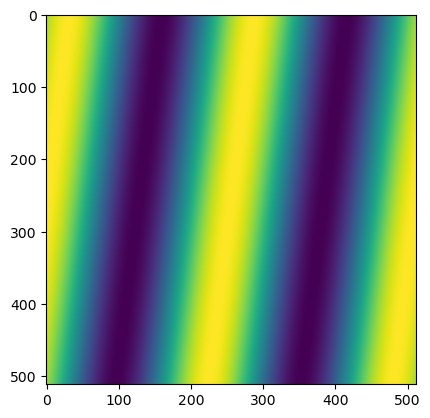

In [69]:
imshow(pixels)

In [70]:
core.get_xy_stage_position()

<pycromanager.zmq_bridge._bridge.java_awt_geom_Point2D$Double at 0x278cf247e80>

In [71]:
def obj_to_list(name):
    name = [name.get(i) for i in range(name.size())]
    return name

In [72]:
devices = core.get_loaded_devices()
obj_to_list(devices)

['DHub',
 'Camera',
 'Dichroic',
 'Emission',
 'Excitation',
 'Objective',
 'Z',
 'Path',
 'XY',
 'Shutter',
 'Autofocus',
 'Core']

In [73]:
core.get_device_name('Camera')

'DCam'

In [79]:
cam_prop = core.get_device_property_names('Camera')
obj_to_list(cam_prop)

['AllowMultiROI',
 'AsyncPropertyDelayMS',
 'AsyncPropertyFollower',
 'AsyncPropertyLeader',
 'Binning',
 'BitDepth',
 'CCDTemperature',
 'CCDTemperature RO',
 'CameraID',
 'CameraName',
 'Description',
 'DisplayImageNumber',
 'DropPixels',
 'Exposure',
 'FastImage',
 'FractionOfPixelsToDropOrSaturate',
 'Gain',
 'HubID',
 'MaximumExposureMs',
 'Mode',
 'MultiROIFillValue',
 'Name',
 'Offset',
 'OnCameraCCDXSize',
 'OnCameraCCDYSize',
 'Photon Conversion Factor',
 'Photon Flux',
 'PixelType',
 'ReadNoise (electrons)',
 'ReadoutTime',
 'RotateImages',
 'SaturatePixels',
 'ScanMode',
 'SimulateCrash',
 'StripeWidth',
 'TestProperty1',
 'TestProperty2',
 'TestProperty3',
 'TestProperty4',
 'TestProperty5',
 'TestProperty6',
 'TransposeCorrection',
 'TransposeMirrorX',
 'TransposeMirrorY',
 'TransposeXY',
 'TriggerDevice',
 'UseExposureSequences']

In [80]:
core.get_property('Camera', 'Gain')

'3'

In [81]:
core.set_property('Camera', 'Gain', 3)
core.get_property('Camera', 'Gain')

'3'

In [82]:
config_groups = core.get_available_config_groups()
obj_to_list(config_groups)

['Camera', 'Channel', 'LightPath', 'Objective', 'System']

In [83]:
camera_config_presets = core.get_available_configs('Camera')
obj_to_list(camera_config_presets)

['HighRes', 'LowRes', 'MedRes']

In [96]:
xy_pos = core.get_xy_stage_position()
xy_pos.to_string()

'Point2D.Double[-0.0, -0.0]'

In [97]:
core.get_position()

0

In [113]:
core.set_relative_xy_position(1.0, 1.0)

In [114]:
xy_pos = core.get_xy_stage_position()
xy_pos.to_string()

'Point2D.Double[101.00999999999999, 101.00999999999999]'

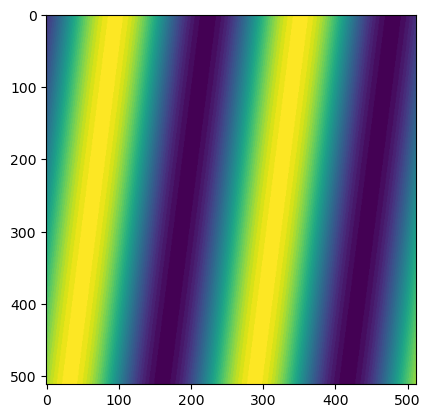

In [115]:
core.snap_image()
tagged_image = core.get_tagged_image()
pix = np.reshape(tagged_image.pix,
                        newshape=[tagged_image.tags['Height'], tagged_image.tags['Width']])
imshow(pix)

## MOSAIC

In [7]:
from pycromanager import Acquisition, multi_d_acquisition_events, Dataset


In [49]:
def center_grid(x, y) :
    #3x3 grid centered on x,y coord
    return np.array([[x-1,y-1], [x,y-1], [x+1,y-1],
                     [x-1,y], [x,y], [x+1,y],
                     [x-1,y+1], [x,y+1], [x+1,y+1]])
    
xy = center_grid(1,2)
xy

array([[0, 1],
       [1, 1],
       [2, 1],
       [0, 2],
       [1, 2],
       [2, 2],
       [0, 3],
       [1, 3],
       [2, 3]])

In [44]:
with Acquisition(directory=r"C:\Users\lociu\Desktop\PriyaM\Data\image_collection", 
                        name='xy_tile_try23') as acq:
    events = multi_d_acquisition_events(xy_positions=xy)
    acq.acquire(events)  
                            
    dataset = acq.get_dataset()

# Tiling scratch

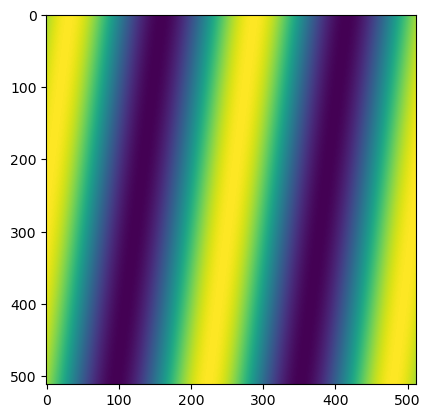

In [51]:
#getting image from dataset
img11 = dataset.read_image(position=0)
imshow(img11)

In [52]:
img11.shape

(512, 512)

In [58]:
img21 = dataset.read_image(position=1)
img2 = Image.fromarray(img21)
img1 = Image.fromarray(img11)

img2.mode

'I;16'

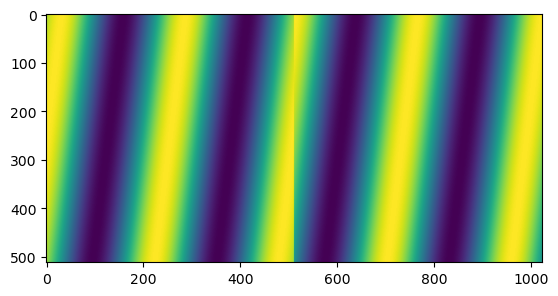

In [66]:
#stitching 2 images
new_image = Image.new(mode='I;16', size=(2*512, 512))
type(new_image)
new_image.paste(img1,(0,0))
new_image.paste(img2,(512,0))
imshow(new_image)

In [55]:
ax = dataset.axes
amount = ax["position"]

In [56]:
q = images_list(dataset)
q[0].size

(512, 512)

# functions for stitching

In [45]:
def images_list(dataset):
    #dataset to list of images
    ax = dataset.axes
    amount = ax["position"]

    im_list = []
    for i in amount:
        im_list.append(Image.fromarray(dataset.read_image(position=i)))
    
    return im_list
        

In [46]:
def stitch_images(lst, n, m):
    #list of images stitched in nxm grid
    sizing = lst[0].size
    mod = lst[0].mode
    #nxwidth of image, mxheight of images
    new_image = Image.new(mode=mod, size=(n*sizing[0], m*sizing[1]))

    iter=0
    for i in range(m):
        for j in range(n):
            #coord are (x,y)
            new_image.paste(lst[iter], (j*sizing[0], i*sizing[1]))
            iter+=1
    return new_image

In [47]:
im_lst= images_list(dataset)
stitched_im= stitch_images(im_lst, 3, 3)

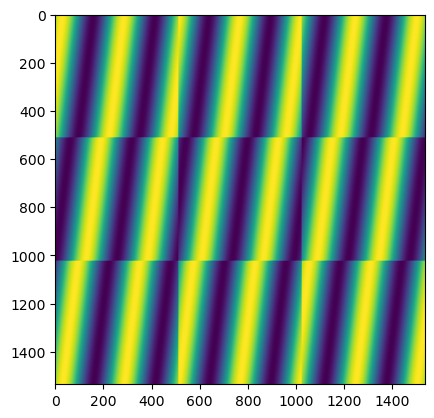

In [48]:
imshow(stitched_im)

# XYTiledAcq

with XYTiledAcquisition(directory=r"C:\Users\lociu\Desktop\PriyaM\image_collection", 
                        name='xy_tile_try15', 
                        tile_overlap=10) as acq:
    #acquire a 2 x 1 grid
    acq.acquire({'axes':
                    {'row': 0, 'col': 0}
                            })
    time.sleep(2)                        
    acq.acquire({'axes':
                    {'row': 1, 'col': 0}
                            })
    time.sleep(2)     

In [43]:
acq.mark_finished()

In [39]:
dataset = acq.get_dataset()

In [41]:
#dataset.as_array()

In [8]:
save_dir = r"C:\Users\lociu\Desktop\PriyaM\image_collection"
acq = XYTiledAcquisition(directory= save_dir, 
                         name='xy_tile_try12', #int = 4827,
                         tile_overlap=10,debug = True)

binding 4828


In [47]:
axis_dict = {'axes':{'row': 0, 'col': 0}}
acq.acquire(axis_dict)

axis_dict = {'axes':{'row': 1, 'col': 0}}
acq.acquire(axis_dict)

axis_dict = {'axes':{'row': 1, 'col': 1}}
acq.acquire(axis_dict)

axis_dict = {'axes':{'row': 0, 'col': 1}}
acq.acquire(axis_dict)

In [9]:
data = acq.get_dataset()

In [10]:
#data.path

In [11]:
#data.has_image()

False

In [13]:
#data.axes

In [ ]:
#acq.await_completion()

In [14]:
acq.mark_finished()

got event(s): None
DEBUG, sending: {'events': [{'special': 'acquisition-end'}]}
closed socket 4828


In [16]:
data = acq.get_dataset()

In [23]:
v = acq.get_viewer()

In [24]:
v.close()

In [27]:
#v.is_acquisition_paused()

In [50]:
#data.read_image(row=0, col =1)

In [51]:
#data.as_array().shape

In [28]:
acq.abort()

In [52]:
#data.as_array().shape